In [73]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools  
import pickle

import keras
from keras.models import Model,Sequential
from keras.applications import VGG16 
from keras.layers import Activation, Dense,Flatten,Dropout
from keras.preprocessing.image import load_img, img_to_array
from keras.optimizers import Adam
from keras.layers import Input
import sklearn
from sklearn.metrics import confusion_matrix ,roc_curve,auc,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.utils.multiclass import unique_labels


In [3]:
def plot_ROC(y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for a specific class
    for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

    

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Reds):
    # this funcation print & plots confusion matrix
    # normalize can be applied by  normalize=True,
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print(" confusion matrix, without normalized")
    print(cm)

    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    
    '''input to confusion_matrix must be a list of predictions, not OHEs (one hot encodings). Call argmax on your y_test and y_pred, and you should get what you expect.'''



In [63]:
#to get the saved value of X(image array after preprocess) and y(label)
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#method let me control the shape of input
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
#model_vgg16_conv.summary()

#Create your own input format
keras_input = Input(shape=(300,200,3), name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(keras_input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
#x=Dense(4096, activation= 'relu')(x)
obt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#Create your own model 
pretrained_model = Model(inputs=keras_input, outputs=x)
pretrained_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
#predict the model
'''X_train = pretrained_model.predict(X_train,verbose=1)
X_test= pretrained_model.predict(X_test,verbose=1)'''
X_train_vgg16=pretrained_model.predict(X,verbose=1)
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#verbose 0, 1 or 2 you just say  how do you want to 'see' the training progress for each epoch.
#0 will show you nothing (silent)
#1 will show you an animated progress bar like this:progres_bar
#2 will just mention the number of epoch like this:epoch


200/200 [==============================] - 132s 660ms/step


accuracy of :  0.775
0.8305357496533966
{0: 0.7979797979797979}
{0: 0.7979797979797979, 1: 0.7916666666666667}
{0: 0.7979797979797979, 1: 0.7916666666666667, 2: 0.9019607843137255}


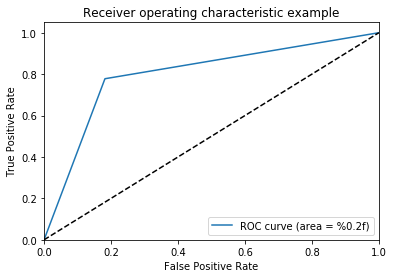

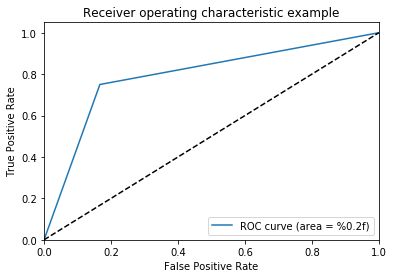

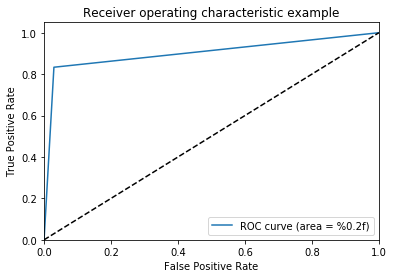

confusion matrix of :  [[14  4  0]
 [ 3 12  1]
 [ 1  0  5]]
 confusion matrix, without normalized
[[14  4  0]
 [ 3 12  1]
 [ 1  0  5]]


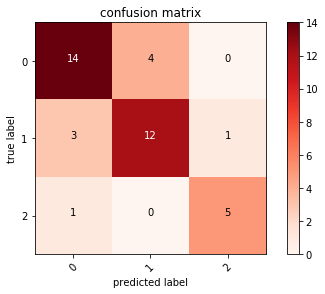

In [69]:
#2=0.75-80
#11=72.5-77.8
#15=75-80
#47=0.775- 0.83....0.725-0.776
#90

X_train, X_test, y_train, y_test = train_test_split(X_train_vgg16,y,test_size=0.2,shuffle=True,random_state=47)


'''#47=0.778-83 
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()'''

#the saved images for training and testing
'''pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)
'''
#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy of : ",acc)

#one hot encoding to calculate the roc-auc plot the Roc Carve and calculate roc auc becouse we are multi- classes 
y_t =keras.utils.to_categorical(y_test, num_classes=3)
y_p =keras.utils.to_categorical(y_pred, num_classes=3)#one hot encoding
auc_value = sklearn.metrics.roc_auc_score(y_t, y_p)
print(auc_value)
plot_ROC(y_t,y_p)
cm = confusion_matrix(y_t.argmax(axis=1), y_p.argmax(axis=1))
print("confusion matrix of : ",cm)

classes = unique_labels(y_t, y_p)
plot_confusion_matrix(cm,classes)

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf ,X=X_train , y=y_train , cv = 10)
print(accuracies)
accuracies.mean()

[0.77777778 0.55555556 0.64705882 0.47058824 0.66666667 0.6
 0.53333333 0.53333333 0.46666667 0.6       ]


0.5850980392156863

# ONE VS Rest


accuracy :  0.575
AUC : 0.7897727272727272
{0: 0.6818181818181818}
{0: 0.6818181818181818, 1: 0.7708333333333333}
{0: 0.6818181818181818, 1: 0.7708333333333333, 2: 0.9166666666666667}


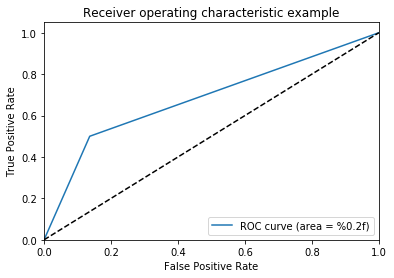

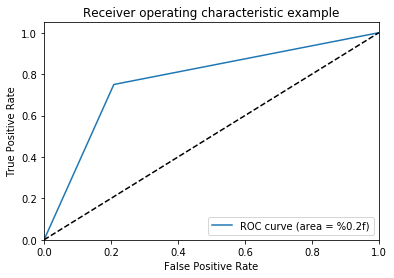

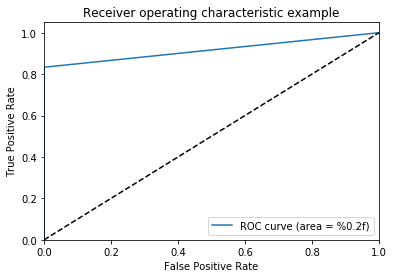

confusion matrix of :  [[15  3  0]
 [ 5 11  0]
 [ 1  0  5]]
 confusion matrix, without normalized
[[15  3  0]
 [ 5 11  0]
 [ 1  0  5]]


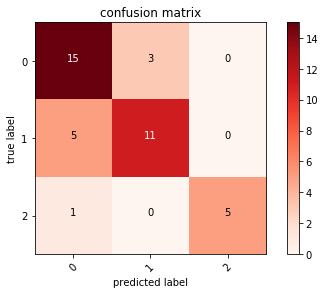

In [10]:
from sklearn.multiclass import OneVsRestClassifier
#Create a svm Classifier with OneVsRestClassifier
clf2 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True)) # Linear Kernel

#with OneVsRestClassifier needs the label to be in one hot label 
y_testOHL=keras.utils.to_categorical(y_test) 
y_trainOHL = keras.utils.to_categorical(y_train)

#Train the model using the training sets
clf2.fit(X_train, y_trainOHL)

#Predict the response for test dataset
y_predOVR = clf2.predict(X_test)

#calculate the acuuracy
acc = accuracy_score(y_testOHL, y_predOVR)
print("accuracy : ",acc)
#calculate the ROC-AUC
auc_value=sklearn.metrics.roc_auc_score(y_testOHL, y_predOVR)

print('AUC :',auc_value)
plot_ROC(y_testOHL,y_predOVR)
#confusion matrix 
cm = confusion_matrix(y_testOHL.argmax(axis=1), y_predOVR.argmax(axis=1))
print("confusion matrix of : ",cm)
plot_confusion_matrix(cm,classes)

In [ ]:
#try with cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf2 ,X=X_train , y=y_train , cv = 10)
print (accuracies)
print(accuracies.mean()) #relivent evalution of the model 